In [11]:
import pandas as pd
import os
import sys

In [12]:

path = os.path.abspath("../")
if(path not in sys.path):
    sys.path.append(path) 

Load Data and Model

In [13]:
import pandas as pd

from src.models.evaluation import *

X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv").squeeze()

model = load_trained_model()


Predictions

In [14]:
y_pred = model.predict(X_test)

# Probabilities for ROC / PR curves
y_prob = model.predict_proba(X_test)[:, 1]


Compute Metrics (Recall Emphasized)

In [15]:

metrics = compute_classification_metrics(
    y_true=y_test,
    y_pred=y_pred,
    y_prob=y_prob
)

metrics


{'accuracy': 0.8732394366197183,
 'precision': 0.8117647058823529,
 'recall': 0.971830985915493,
 'f1_score': 0.8846153846153846,
 'roc_auc': np.float64(0.9775838127355684)}

Confusion Matrix Analysis

In [16]:

conf_matrix = get_confusion_matrix(y_test, y_pred)
conf_matrix


array([[55, 16],
       [ 2, 69]])

ROC & Precision-Recall Curves

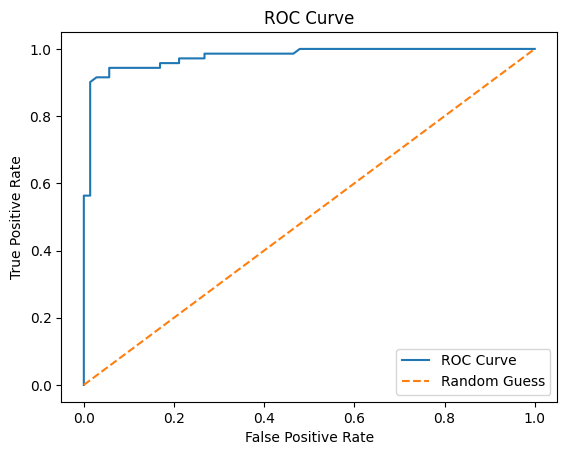

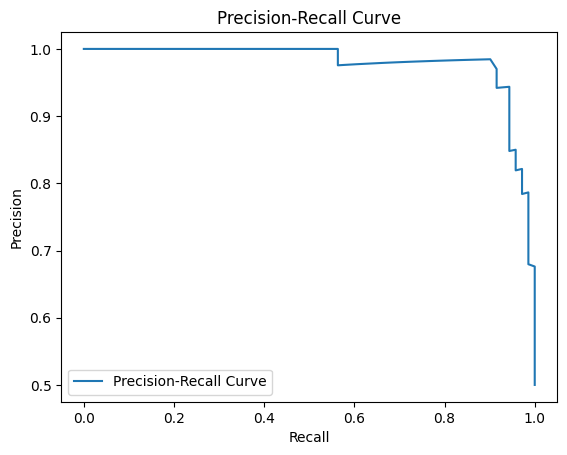

In [17]:

plot_roc_curve(y_test, y_prob)
plot_precision_recall_curve(y_test, y_prob)


Error Analysis

In [18]:

misclassified_samples = get_misclassifications(
    X_test, y_test, y_pred
)

misclassified_samples.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
7,-1.468401,0.651330,1.243024,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12,-0.567585,-1.376569,1.524867,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
18,1.234045,0.279671,-0.729880,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
19,-1.355799,0.526724,0.608876,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
29,-1.243197,-0.182279,1.595328,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Model Interpretability

In [19]:

feature_importance = get_feature_importance(model)

feature_importance


array([0.21524897, 0.29773357, 0.31359624, 0.01698978, 0.01640472,
       0.01779901, 0.01635709, 0.0174963 , 0.01899266, 0.0160375 ,
       0.01853305, 0.01721186, 0.01759925])

Save Evaluation Results

In [20]:

evaluation_summary = {
    "metrics": metrics,
    "confusion_matrix": conf_matrix.tolist(),
    "model_type": type(model).__name__
}

save_evaluation_results(evaluation_summary)
